<a href="https://colab.research.google.com/github/priyabodke41/Regression_capstone_project/blob/main/Regression_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree



In [2]:
plt.style.use('seaborn')
plt.rcParams['axes.titlesize']=16
plt.rcParams['axes.titleweight']='bold'
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.labelsize']=15
plt.rcParams['font.weight']='bold'
plt.rcParams['legend.fontsize']=12
plt.rcParams['legend.title_fontsize']=12

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
stockdata= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/capston project 2/data_YesBank_StockPrices (1).csv")
stockdata

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [5]:
stockdata.shape

(185, 5)

In [6]:
stockdata.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**We have 185 rows and 4 columns in our dataset with no null values. Here our dependent variable will be Close, and independent variables are - Open, High and Low.**

**Date: It denotes the month and year of the for a particular price.**
**Open: Open means the price at which a stock started trading that month.**
**High: refers to the maximum price that month.**
**Low: refers to the minimum price that month.**
**Close: refers to the final trading price for that month, which we have to predict using regression**

In [8]:
#checking for null values
stockdata.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

No missing values in dataset.

In [9]:
#checking for duplicate values
stockdata.duplicated().sum()

0

No duplicate values in dataset

In [10]:
from datetime import datetime
stockdata['Date'] = stockdata['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [11]:
stockdata.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


**Exploratory Data Analysis**

Text(0.5, 1.0, 'Yes Bank closing price')

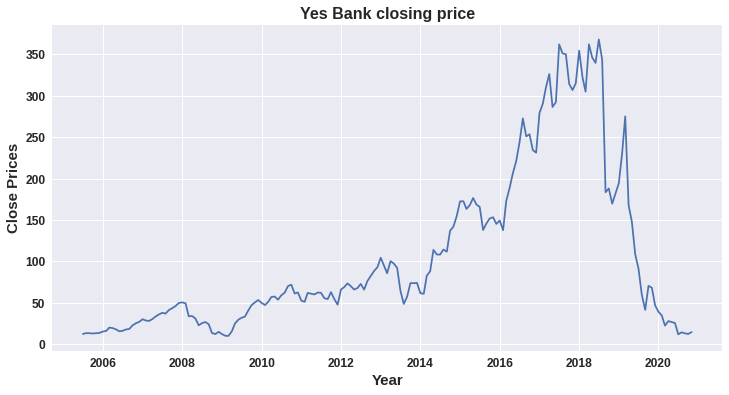

In [12]:
#visualising closing price on year basis
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Close Prices')
plt.plot(stockdata['Date'], stockdata['Close'])
plt.title('Yes Bank closing price')


Text(0.5, 1.0, 'Yes Bank opening price')

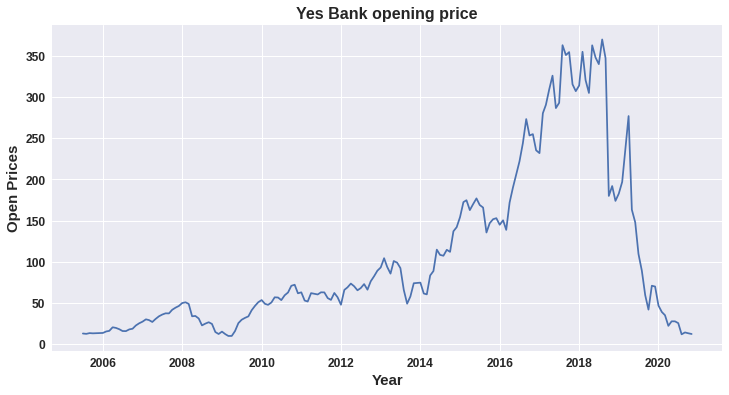

In [13]:
#visualising opening price on year basis
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Open Prices')
plt.plot(stockdata['Date'], stockdata['Open'])
plt.title('Yes Bank opening price')


**Distribution of dependant variable**
**(Close Price of stock)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


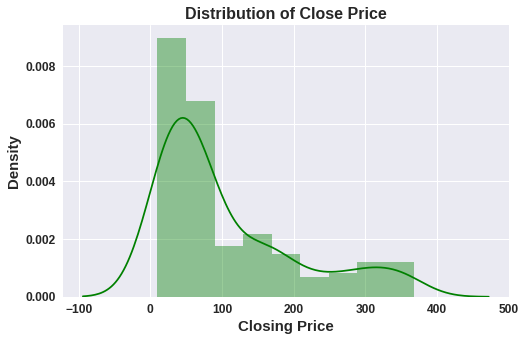

In [14]:
plt.figure(figsize=(8,5))
sns.distplot(stockdata['Close'],color="g")
plt.title('Distribution of Close Price')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.show()

Closing price Distribution Plot is right side skewed so to make it normal distribution apply log transformation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


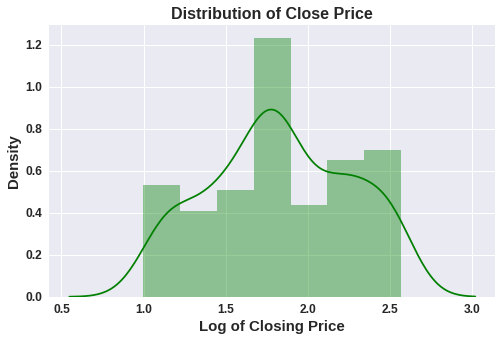

In [15]:
plt.figure(figsize=(8,5))
sns.distplot(np.log10(stockdata['Close']),color='green')
plt.title('Distribution of Close Price')
plt.xlabel('Log of Closing Price')
plt.ylabel('Density')
plt.show()

After applying log transformation, distribution of closing price is more normal.

**Distribution of independant variable (Open,High,Low Prices of stock)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


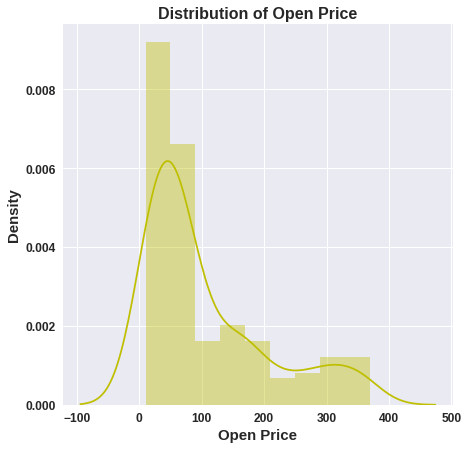

In [16]:
plt.figure(figsize=(7,7))
sns.distplot(stockdata['Open'],color="y")
plt.title('Distribution of Open Price')
plt.xlabel('Open Price')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


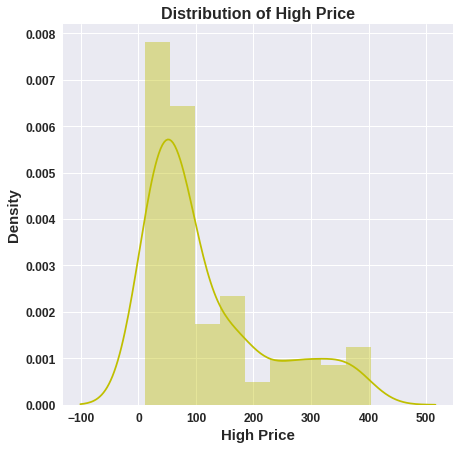

In [17]:
plt.figure(figsize=(7,7))
sns.distplot(stockdata['High'],color="y")
plt.title('Distribution of High Price')
plt.xlabel('High Price')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


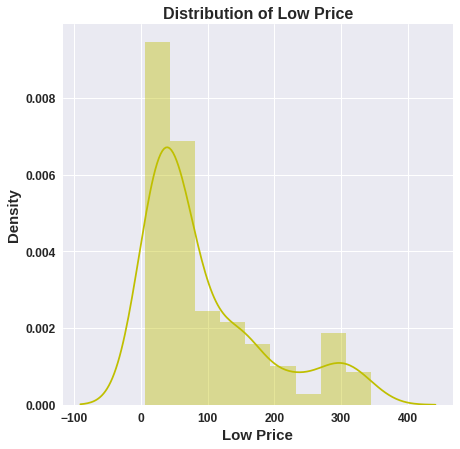

In [18]:
plt.figure(figsize=(7,7))
sns.distplot(stockdata['Low'],color="y")
plt.title('Distribution of Low Price')
plt.xlabel('Low Price')
plt.ylabel('Density')
plt.show()

**Plotting distribution for each of numerical features by applying log transformation**

In [19]:
features=list(set(stockdata.describe().columns) - {'Close'})


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.show(*args, **kw)>

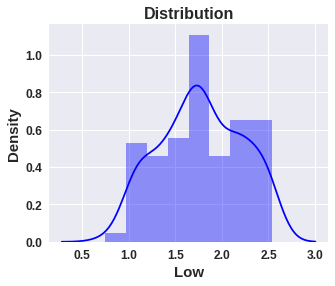

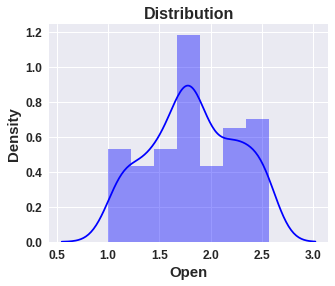

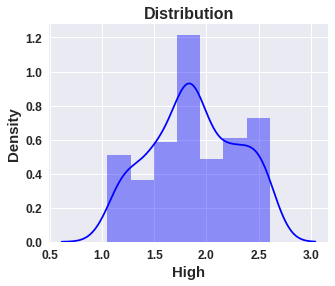

In [20]:
for col in features:
    plt.figure(figsize=(5,4))
    sns.distplot(np.log10(stockdata[col]), color='blue')
    plt.title("Distribution")
    plt.xlabel(col)
    plt.ylabel('Density')
plt.show


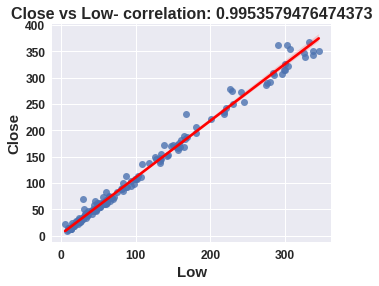

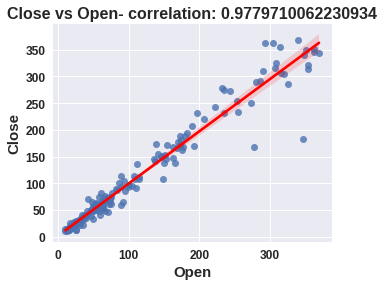

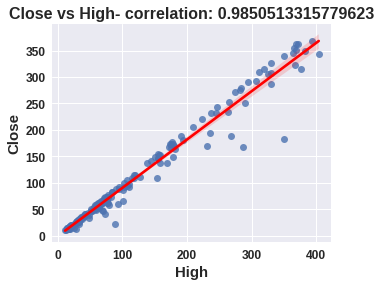

In [21]:
for col in features:
  fig=plt.figure(figsize=(5,4))
  ax=fig.gca()
  feature=stockdata[col]
  label=stockdata['Close']
  correlation= feature.corr(label)
  sns.regplot(x=stockdata[col],y=stockdata["Close"],line_kws={"color": "red"})
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' +col +'- correlation: '+ str(correlation))

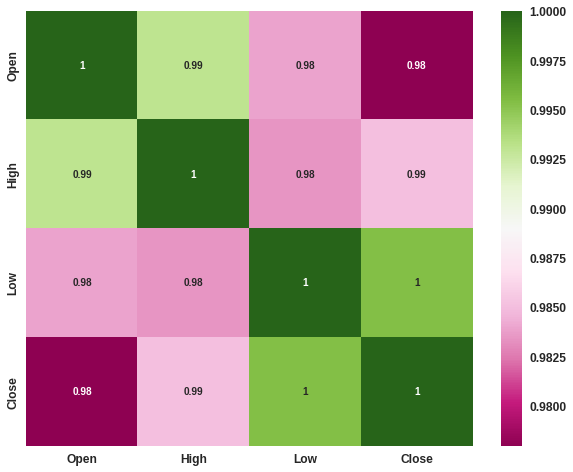

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(stockdata.corr(),cmap='PiYG',annot=True)

All variables shows high correlation with each other.

In [23]:
X = stockdata.drop(columns=['Close','Date'])
y = np.log10(stockdata['Close'])

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [25]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [26]:
#checking shape of training dataset.
X_train.shape

(148, 3)

In [27]:
X_test.shape

(37, 3)

In [28]:
linear_regressor = LinearRegression()
linear_regressor_model = linear_regressor.fit(X_train,y_train)

In [29]:
round(linear_regressor_model.score(X_train,y_train), 3)

0.815

In [30]:
round(linear_regressor_model.score(X_test,y_test), 3)

0.823

In [31]:
y_pred = linear_regressor_model.predict(X_test)

Evaluation Metrics of Linear Regression

In [32]:
print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("R2 :",round(r2_score(y_test, y_pred), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
R2 : 0.823


Actual Vs predicted Close Price

Text(0, 0.5, 'Closing Price')

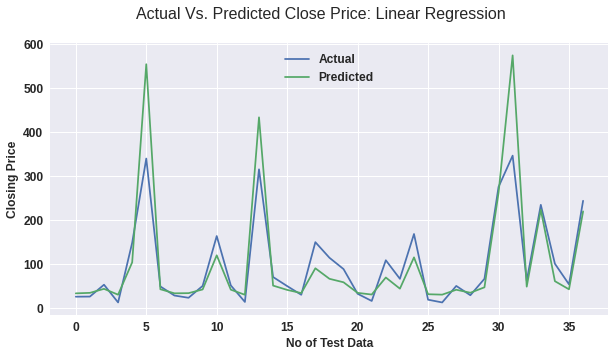

In [33]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)


**2. Lasso Regression**

In [34]:
lasso_reg = Lasso(alpha=0.005,max_iter=3000)
lasso_reg_model = lasso_reg.fit(X_train,y_train)

In [35]:
#accuracy of lasso regression model on training data
round(lasso_reg_model.score(X_train,y_train),3)

0.813

In [36]:
#accuracy of lasso regression model on testing data
round(lasso_reg_model.score(X_test,y_test),3)

0.817

In [37]:
y_pred_lasso = lasso_reg_model.predict(X_test)

Evaluation Metrics of Lasso Regression

In [38]:
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 3))

MSE : 0.033
RMSE : 0.181
MAE : 0.153
R2 : 0.817


Lasso Regression: Actual Vs. Predicted

Text(0, 0.5, 'Closing Price')

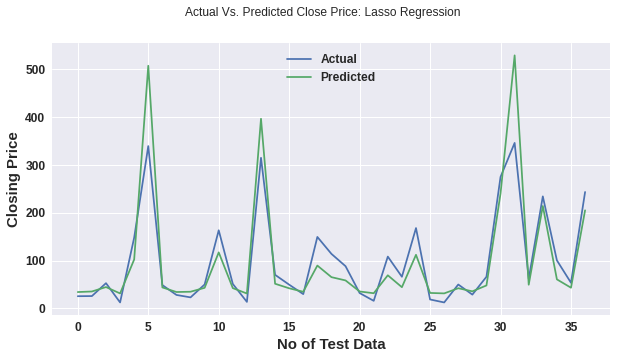

In [39]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression')
plt.legend(['Actual','Predicted'])
plt.xlabel('No of Test Data')
plt.ylabel('Closing Price')


Cross Validation on Lasso Regression

In [40]:
from sklearn.linear_model import Lasso, LassoCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3,return_train_score=True)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.613e+00, tolerance: 1.798e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.632e+00, tolerance: 1.821e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.03520741646186052


In [42]:
y_pred_lasso_cv = lasso_regressor.predict(X_test)

Evaluation Metrics of Lasso Regression after Validation

In [43]:
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 3))

MSE : 0.032
RMSE : 0.179
MAE : 0.152
R2 : 0.82


**3. Ridge Regression**

In [44]:
ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [45]:
#Accuracy of ridge regression model on training data
round(ridge_reg.score(X_train,y_train),3)

0.815

In [46]:
#Accuracy of ridge regression model on training data
round(ridge_reg.score(X_test,y_test),3)

0.822

In [47]:
y_pred_ridge = ridge_reg.predict(X_test)

In [48]:
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
R2 : 0.822


Text(0, 0.5, 'Closing Price')

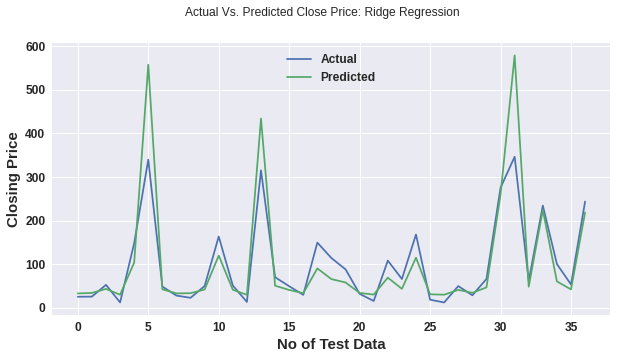

In [49]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression')
plt.legend(['Actual','Predicted'])
plt.xlabel('No of Test Data')
plt.ylabel('Closing Price')

Cross Validation on Ridge Regression

In [50]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,8,6,19,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 8, 6, 19, 20, 21, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [51]:
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 8, 6, 19, 20, 21, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [52]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.03630154669866118


In [53]:
y_pred_ridge_cv = ridge_regressor.predict(X_test)

Evaluation Metrics of Ridge Regression after Validation

In [54]:
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 3))

MSE : 0.033
RMSE : 0.181
MAE : 0.153
R2 : 0.816


**4.DECESION TREE REGRESSOR**

In [55]:
Decision_regressor =DecisionTreeRegressor(random_state=10)

In [56]:
Decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=10)

In [57]:
y_pred_dec=Decision_regressor.predict(X_test)

In [58]:
print("MSE :",round(mean_squared_error(y_test, y_pred_dec), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_dec)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_dec),3))
print("R2 :",round(r2_score(y_test, y_pred_dec), 3))

MSE : 0.002
RMSE : 0.044
MAE : 0.033
R2 : 0.989


Text(0, 0.5, 'Closing Price')

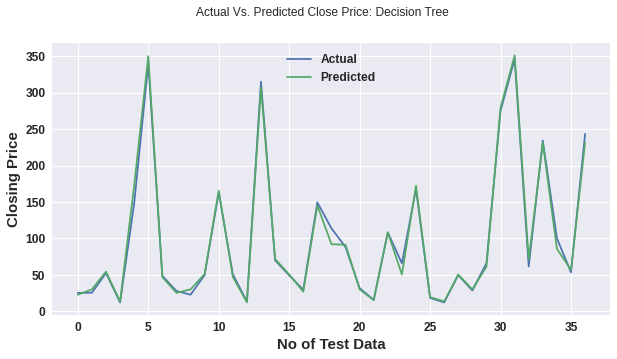

In [71]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_dec))
plt.suptitle('Actual Vs. Predicted Close Price: Decision Tree')
plt.legend(['Actual','Predicted'])
plt.xlabel('No of Test Data')
plt.ylabel('Closing Price')

**5.XGBOOST REGRESSOR**

In [59]:
#fitting data
xgb = XGBRegressor()
xgboost_reg=xgb.fit(X_train,y_train)

[04:58:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [60]:
#Check the accuracy of our model on training data
round(xgboost_reg.score(X_train,y_train),3)

0.999

In [61]:
#Check the accuracy of our model on testing data
round(xgboost_reg.score(X_test,y_test),3)

0.991

In [62]:
y_pred_xgb = xgb.predict(X_test)

In [63]:
print("MSE :",round(mean_squared_error(y_test, y_pred_xgb), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_xgb)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_xgb),3))
print("R2 :",round(r2_score(y_test, y_pred_xgb), 3))

MSE : 0.002
RMSE : 0.039
MAE : 0.03
R2 : 0.991


Text(0, 0.5, 'Closing Price')

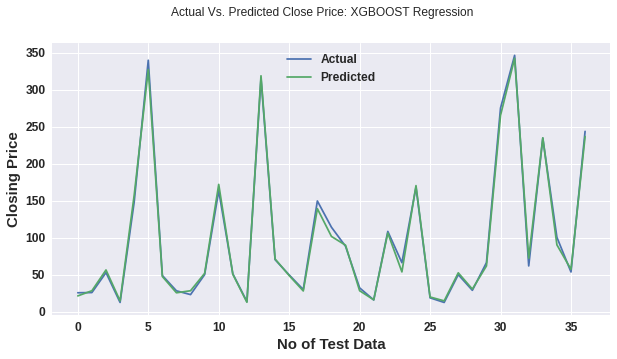

In [64]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_xgb))
plt.suptitle('Actual Vs. Predicted Close Price: XGBOOST Regression')
plt.legend(['Actual','Predicted'])
plt.xlabel('No of Test Data')
plt.ylabel('Closing Price')

In [65]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)
  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)
    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 3)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),3)
    MAE = round(mean_absolute_error(y_test, y_pred),3)
    R2 = round(r2_score(y_test, y_pred), 3)

    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "R2"] = R2

    #to get values in next rows for next model
    i=i+1

  #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True,ignore_index=True)
    
  return df

In [66]:
all_model = [ linear_regressor,lasso_reg,ridge_reg,Decision_regressor,xgboost_reg]

In [72]:
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, all_model)
matrics_compare_df


[05:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model,MSE,RMSE,MAE,R2
0,XGBRegressor,0.002,0.039,0.030,0.991
1,DecisionTreeRegressor,0.002,0.044,0.033,0.989
2,LinearRegression,0.032,0.178,0.151,0.823
3,Ridge,0.032,0.178,0.151,0.822
4,Lasso,0.033,0.181,0.153,0.817


**Conclusion**

**In Exploratory Data Analysis we observed that**

1.There is increase in trend of Yes Bank's stock's Close price till 2018 an then sudden decrease.

2.There is increase in trend of Yes Bank's stock's Open price till 2018 an then sudden decrease.

3.Close, Open and high price of stock are strongly correlated with each other.

**We have implemented 6 models and we observed that**

1.Linear, lasso and ridge regressions show almost same R squared values.
ie.82.00%

2.**XGBOOST with accuracy of 99.00% & Decesion tree with accuracy of 98% which is excellent.**


4.The accuracy for each model is more than 80%.

